###  Breast Cancer Prediction Model Using Logistic Regression

#### Import Library Files 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

# import warnings
# warnings.filterwarnings("ignore")
df = pd.read_csv('Breast_cancer_data.csv')
print(df )


# 'Dataset Overview and Basic Statistics'
# df.info()
# df.describe()

# df.isnull().sum()   
# print(df.isnull().sum())
# df.duplicated().sum()   
print(df.duplicated().sum())





     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2           

### Explanation of the Code

#### 1️⃣ Importing Required Libraries
- `import numpy as np`  
  - Imports the **NumPy** library, which is used for numerical computations (arrays, matrices, mathematical operations).  

- `import pandas as pd`  
  - Imports the **Pandas** library, which is used for data manipulation and analysis (handling datasets, DataFrames, and Series).  

#### 2️⃣ Ignoring Warnings
- `import warnings`  
  - Imports the **warnings** module, which manages warning messages in Python.  

- `warnings.filterwarnings("ignore")`  
  - Suppresses **all warnings**, preventing unnecessary warning messages from appearing in the output.  
  - Useful to keep the output clean while running machine learning models.  


#### Load The Dataset

In [3]:
df = pd.read_csv("Breast_cancer_data.csv")

In [4]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


### Explanation of `df = pd.read_csv("Breast_cancer_data.csv")`

#### 1️⃣ What Does This Code Do?
- Reads the **CSV (Comma-Separated Values) file** named `"Breast_cancer_data.csv"`.  
- Loads the dataset into a **Pandas DataFrame (`df`)** for further analysis and processing.  

#### 2️⃣ Breakdown of Each Part
- **`pd.read_csv(...)`**  
  - A function from the **Pandas** library that reads a CSV file and converts it into a structured **DataFrame**.  
- **`"Breast_cancer_data.csv"`**  
  - The **name of the dataset file** (it should be in the same directory as the script, or provide the full file path).  
- **`df` (DataFrame)**  
  - Stores the dataset in a structured table format, where:  
    - **Rows** = Data samples (patients)  
    - **Columns** = Features (e.g., mean_radius, mean_texture, diagnosis, etc.)  





#### Dataset Overview And Statistics 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


### Explanation of `df.info()`

#### 1️⃣ What Does This Code Do?
- Displays **a summary of the dataset**, including:
  - **Total number of rows and columns**.
  - **Column names and their data types**.
  - **Number of non-null (non-missing) values in each column**.
  - **Memory usage of the DataFrame**.


In [6]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


### Explanation of `df.describe()`
#### 1️⃣ What Does This Code Do?
- Provides **statistical summary** of all **numerical columns** in the dataset.
- Computes key descriptive statistics, including:
  - **Count** → Number of non-null values.
  - **Mean** → Average value.
  - **Standard Deviation (std)** → Spread of the data.
  - **Minimum (min)** → Smallest value.
  - **Percentiles (25%, 50%, 75%)** → Quartiles of the data.
  - **Maximum (max)** → Largest value.


#### Data Preprocessing

In [7]:
print(df.isnull().sum())

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


### Explanation of `print(df.isnull().sum())`

#### 1️⃣ What Does This Code Do?
- Checks for **missing (null) values** in each column of the dataset.
- Returns the total number of missing values per column.
- If all values are `0`, there are **no missing values**.

In [8]:
print(df.duplicated().sum())

0


### Explanation of `print(df.duplicated().sum())`

#### 1️⃣ What Does This Code Do?
- Checks for **duplicate rows** in the dataset.
- Returns the **total number of duplicate rows**.
- If the output is `0`, there are **no duplicate records**.


#### Expolatory Data Analysis And Visulization

In [9]:
!pip install matplotlib
!pip install seaborn

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


C:\Users\skyli\AppData\Local\Temp\ipykernel_14240\3935532295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=['green', 'red'])


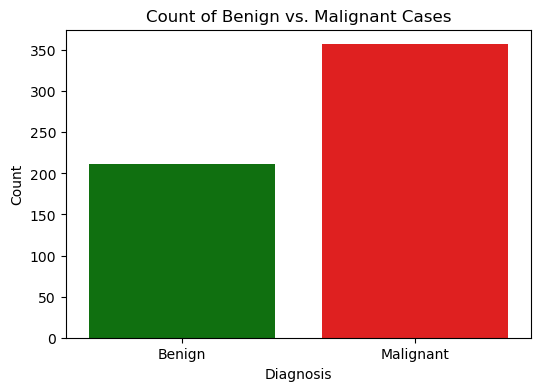

In [12]:
# Convert diagnosis to categorical labels if not already done
df['diagnosis'] = df['diagnosis'].map({1: 'Malignant', 0: 'Benign'})

### 1️⃣ Count Plot - Benign vs. Malignant ###
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette=['green', 'red'])
plt.title("Count of Benign vs. Malignant Cases")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

### Explanation of the Code

#### 1️⃣ Convert `diagnosis` to Categorical Labels
- **Purpose**: Convert numerical values in the `diagnosis` column (1 and 0) to more understandable categorical labels ("Malignant" and "Benign").
- **`.map({1: 'Malignant', 0: 'Benign'})`**: This method maps the numeric values `1` and `0` to the strings `'Malignant'` and `'Benign'`, respectively.  
  - `1` becomes `'Malignant'` (indicating cancerous).
  - `0` becomes `'Benign'` (indicating non-cancerous).

#### 2️⃣ Count Plot - Benign vs. Malignant Cases
- **Purpose**: Visualize the distribution of cases (Benign vs. Malignant) in the dataset.
- **`sns.countplot()`**: This Seaborn function creates a **count plot**, which shows the **frequency of categories** in the dataset.  
  - **x='diagnosis'**: Plots the data according to the `diagnosis` column.
  - **data=df**: The data is taken from the `df` DataFrame.
  - **palette=['green', 'red']**: The color palette for the plot. `green` is used for Benign, and `red` for Malignant.

#### 3️⃣ Plot Elements
- **`plt.figure(figsize=(6, 4))`**: Specifies the size of the plot (6 inches by 4 inches).
- **`plt.title("Count of Benign vs. Malignant Cases")`**: Adds a title to the plot for clarity.
- **`plt.xlabel("Diagnosis")`**: Labels the x-axis as "Diagnosis", which indicates the two categories (Benign and Malignant).
- **`plt.ylabel("Count")`**: Labels the y-axis as "Count", indicating the number of occurrences of each category.
- **`plt.show()`**: Displays the plot.



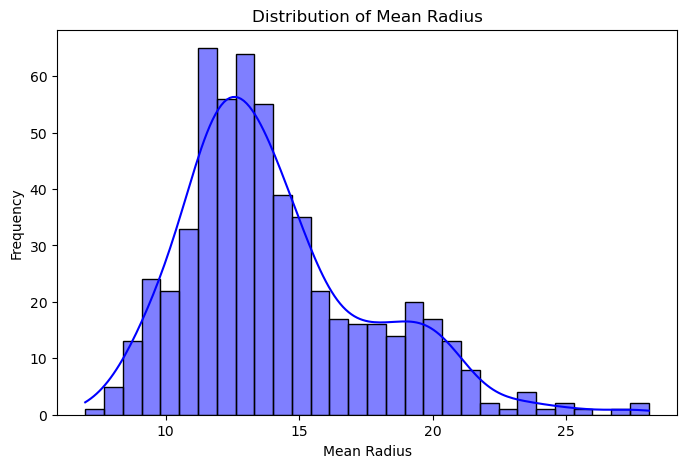

In [13]:
### 2️⃣ Histogram - Distribution of a Feature (mean_radius) ###
plt.figure(figsize=(8, 5))
sns.histplot(df['mean_radius'], bins=30, kde=True, color="blue")
plt.title("Distribution of Mean Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")
plt.show()

### Explanation of the Code

#### 1️⃣ Histogram - Distribution of a Feature (`mean_radius`)
- **Purpose**: Visualize the distribution of the `mean_radius` feature in the dataset.
- A **histogram** shows the frequency distribution of a continuous variable, in this case, the `mean_radius` of the tumors. 

#### 2️⃣ Breakdown of the Code

- **`sns.histplot()`**: A Seaborn function used to create histograms.
  - **`df['mean_radius']`**: The feature for which the histogram is being plotted (mean_radius of tumors).
  - **`bins=30`**: Specifies the number of bins (intervals) for the histogram. It helps in controlling how granular the distribution is.
  - **`kde=True`**: Adds a **Kernel Density Estimate (KDE)** curve on top of the histogram. This curve smooths the data to show the overall distribution more clearly.
  - **`color="blue"`**: Sets the color of the histogram bars to **blue**.

#### 3️⃣ Plot Elements
- **`plt.figure(figsize=(8, 5))`**: Sets the size of the plot (8 inches by 5 inches).
- **`plt.title("Distribution of Mean Radius")`**: Adds a title to the plot for clarity.
- **`plt.xlabel("Mean Radius")`**: Labels the x-axis as "Mean Radius" to represent the values of the `mean_radius` feature.
- **`plt.ylabel("Frequency")`**: Labels the y-axis as "Frequency", indicating the number of occurrences of each value or range of values.
- **`plt.show()`**: Displays the histogram plot.


  


#### Model 

In [14]:
!pip install scikit-learn

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

### Explanation of the Code

#### 1️⃣ Importing `train_test_split` from `sklearn.model_selection`
- **`from sklearn.model_selection import train_test_split`**  
  - This imports the `train_test_split` function from the **scikit-learn** library. It is used to split the dataset into training and testing sets for machine learning models.  
  - Helps in **model evaluation** by using separate data for training and testing to prevent overfitting.

#### 2️⃣ Separating Features and Target Variables

- **`X = df.drop(columns = ['diagnosis'])`**  
  - **`X`** represents the feature matrix (input variables for the model).  
  - `df.drop(columns = ['diagnosis'])` removes the `diagnosis` column from the dataset because it is the **target variable** (what we want to predict).
  - The remaining columns (`mean_radius`, `mean_texture`, etc.) are used as input features.

- **`y = df['diagnosis']`**  
  - **`y`** represents the target variable (output label).  
  - `df['diagnosis']` selects the `diagnosis` column, which contains the labels: `'Malignant'` or `'Benign'` (encoded as 1 and 0).


In [16]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [17]:
y

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
         ...    
564       Benign
565       Benign
566       Benign
567       Benign
568    Malignant
Name: diagnosis, Length: 569, dtype: object

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.2, random_state= 42)

### Explanation of the Code

#### 1️⃣ Splitting the Data into Training and Testing Sets
- **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`**  
  - This line splits the features (`X`) and target labels (`y`) into **training** and **testing** datasets.
  - **`train_test_split`** is used to randomly divide the data, ensuring that the model is trained on a subset of the data and evaluated on a separate unseen subset.

#### 2️⃣ Parameters Breakdown
- **`X`**: The feature matrix (input data).
- **`y`**: The target labels (what we want to predict).
- **`test_size=0.2`**: Specifies the proportion of the dataset to include in the test split. Here, `20%` of the data will be used for testing, and the remaining `80%` will be used for training.
- **`random_state=42`**: Ensures the data is split the same way each time you run the code, ensuring reproducibility. Changing this value will result in a different split.

#### 3️⃣ Output Variables
- **`X_train`**: The training set for the input features.
- **`X_test`**: The testing set for the input features.
- **`y_train`**: The training set for the target labels.
- **`y_test`**: The testing set for the target labels.




In [19]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
68,9.029,17.33,58.79,250.5,0.10660
181,21.090,26.57,142.70,1311.0,0.11410
63,9.173,13.86,59.20,260.9,0.07721
248,10.650,25.22,68.01,347.0,0.09657
60,10.170,14.88,64.55,311.9,0.11340
...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783
106,11.640,18.33,75.17,412.5,0.11420
270,14.290,16.82,90.30,632.6,0.06429
435,13.980,19.62,91.12,599.5,0.10600


In [20]:
X_test

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
204,12.47,18.60,81.09,481.9,0.09965
70,18.94,21.31,123.60,1130.0,0.09009
131,15.46,19.48,101.70,748.9,0.10920
431,12.40,17.68,81.47,467.8,0.10540
540,11.54,14.44,74.65,402.9,0.09984
...,...,...,...,...,...
486,14.64,16.85,94.21,666.0,0.08641
75,16.07,19.65,104.10,817.7,0.09168
249,11.52,14.93,73.87,406.3,0.10130
238,14.22,27.85,92.55,623.9,0.08223


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Explanation of the Code

#### 1️⃣ Importing `LogisticRegression` from `sklearn.linear_model`
- **`from sklearn.linear_model import LogisticRegression`**  
  - This imports the `LogisticRegression` class from the **scikit-learn** library, which is used for creating and training logistic regression models.
  - **Logistic Regression** is a statistical model commonly used for binary classification tasks (e.g., classifying whether a tumor is malignant or benign).

#### 2️⃣ Creating and Training the Model

- **`model = LogisticRegression()`**  
  - This creates an instance of the **LogisticRegression** model. The model is now ready to be trained on the data.

- **`model.fit(X_train, y_train)`**  
  - The **`fit()`** method is used to **train the model** on the provided data.
  - **`X_train`** is the training set of input features (the data that will be used to make predictions).
  - **`y_train`** is the training set of target labels (the known correct answers we want the model to predict).
  - During this step, the logistic regression algorithm learns the relationship between the input features (`X_train`) and the target labels (`y_train`), adjusting its parameters (coefficients) to minimize error.




In [22]:
y_pred = model.predict(X_test)
y_pred

array(['Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Malignant',
 

### Explanation of the Code

#### 1️⃣ Predicting the Target Labels for the Test Set
- **`y_pred = model.predict(X_test)`**  
  - This line uses the trained logistic regression model to **predict** the target labels for the test data (`X_test`).
  - **`model.predict(X_test)`**: The `predict()` method generates predicted labels based on the features in `X_test`. These predictions represent the model's guess for whether each sample in the test set is Malignant or Benign.

#### 2️⃣ Output
- **`y_pred`**: The predicted target labels for the test set. This will be an array of **0s and 1s**, where:
  - `1` represents **Malignant** (cancerous).
  - `0` represents **Benign** (non-cancerous).



#### Model Evaluation 

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy ", accuracy)

Model Accuracy  0.9298245614035088


### Explanation of the Code

#### 1️⃣ Importing `accuracy_score` from `sklearn.metrics`
- **`from sklearn.metrics import accuracy_score`**  
  - This imports the `accuracy_score` function from the **scikit-learn** library.
  - **Accuracy score** is a common metric used to evaluate classification models. It represents the proportion of correctly predicted instances (both Malignant and Benign) out of the total instances in the test set.

#### 2️⃣ Calculating the Model Accuracy

- **`accuracy = accuracy_score(y_test, y_pred)`**  
  - This line calculates the **accuracy** of the model's predictions.
  - **`y_test`**: The actual target labels (true values) from the test set.
  - **`y_pred`**: The predicted labels generated by the model.
  - The **accuracy score** is calculated as:
    \[
    \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
    \]
  - It returns a value between 0 and 1, where `1.0` indicates perfect accuracy (all predictions are correct), and `0.0` indicates no correct predictions.

#### 3️⃣ Output
- **`accuracy`**: The **accuracy score** of the model. It is a floating-point value between `0` and `1`. 
  - For example, if the accuracy is `0.85`, it means the model correctly predicted 85% of the test data.

- **`print("Model Accuracy ", accuracy)`**  
  - Displays the calculated accuracy score in the console.


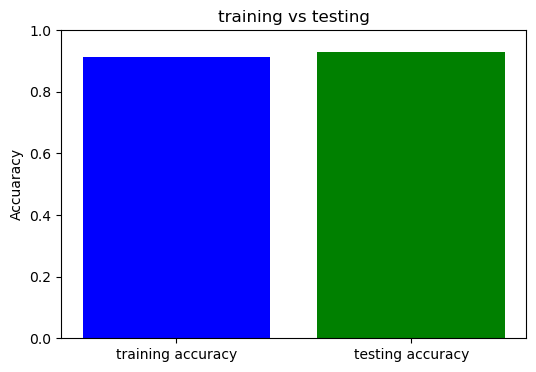

In [24]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test,y_pred)

plt.figure(figsize = (6,4))
plt.bar(["training accuracy", "testing accuracy"],[train_accuracy,test_accuracy], color = ['blue','green'])
plt.ylim(0,1)
plt.ylabel("Accuaracy")
plt.title("training vs testing")
plt.show()

### Explanation of the Code

#### 1️⃣ Calculating Training and Testing Accuracy

- **`train_accuracy = accuracy_score(y_train, model.predict(X_train))`**  
  - This line calculates the accuracy of the model on the **training set**.
  - **`model.predict(X_train)`**: Predicts the labels for the training data (`X_train`).
  - **`y_train`**: The actual labels for the training data.
  - **`accuracy_score(y_train, model.predict(X_train))`**: Compares the predicted values with the actual values and returns the accuracy score for the training data.

- **`test_accuracy = accuracy_score(y_test, y_pred)`**  
  - This line calculates the accuracy of the model on the **test set**.
  - **`y_pred`**: The predicted labels for the test data (`X_test`), which were calculated earlier.
  - **`accuracy_score(y_test, y_pred)`**: Compares the predicted values (`y_pred`) with the actual values (`y_test`) and returns the accuracy score for the test data.

#### 2️⃣ Plotting the Accuracy Comparison

- **`plt.figure(figsize=(6, 4))`**  
  - Sets the figure size of the plot (6 inches by 4 inches).
  
- **`plt.bar(["training accuracy", "testing accuracy"], [train_accuracy, test_accuracy], color=['blue', 'green'])`**  
  - Creates a **bar chart** to compare the training and testing accuracy.
  - The x-axis labels are `"training accuracy"` and `"testing accuracy"`, representing the two types of accuracy.
  - The y-axis values are `train_accuracy` and `test_accuracy`, which represent the respective accuracy scores.
  - The colors for the bars are **blue** for training accuracy and **green** for testing accuracy.

- **`plt.ylim(0, 1)`**  
  - Sets the **y-axis limits** to range from 0 to 1, as accuracy values lie within this range.

- **`plt.ylabel("Accuracy")`**  
  - Labels the y-axis as "Accuracy" to indicate that the values represent model accuracy.

- **`plt.title("Training vs Testing")`**  
  - Adds a title to the plot, indicating that this graph compares the accuracy of the model on training vs. testing data.

- **`plt.show()`**  
  - Displays the bar chart.
